# Universidad del Valle de Guatemala
# Deep Learning y Sistemas Inteligentes
<hr></hr>

## Proyecto Final
## Estudio y desarrollo de red neuronal para la clasificación de productos de tecnología, alimentos y mobiliario

### Iteracion 2 de modelos

### Autores:
Andres de la Roca - 20332  
Jun Woo Lee - 20358

In [3]:
# Cargando las librerias necesarias para el proyecto
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline
import os
import shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Exploracion de la data

In [4]:
# Cargando los datos
modelpath = "./models/"
dataset = "./dataset/images/"
train_path = dataset + "train/"
test_path = dataset + "test/"

# Cambiar segun cantidad de datos
train_length = 640
# train_length = train_length + 1
test_length = 120
# test_length = test_length + 1

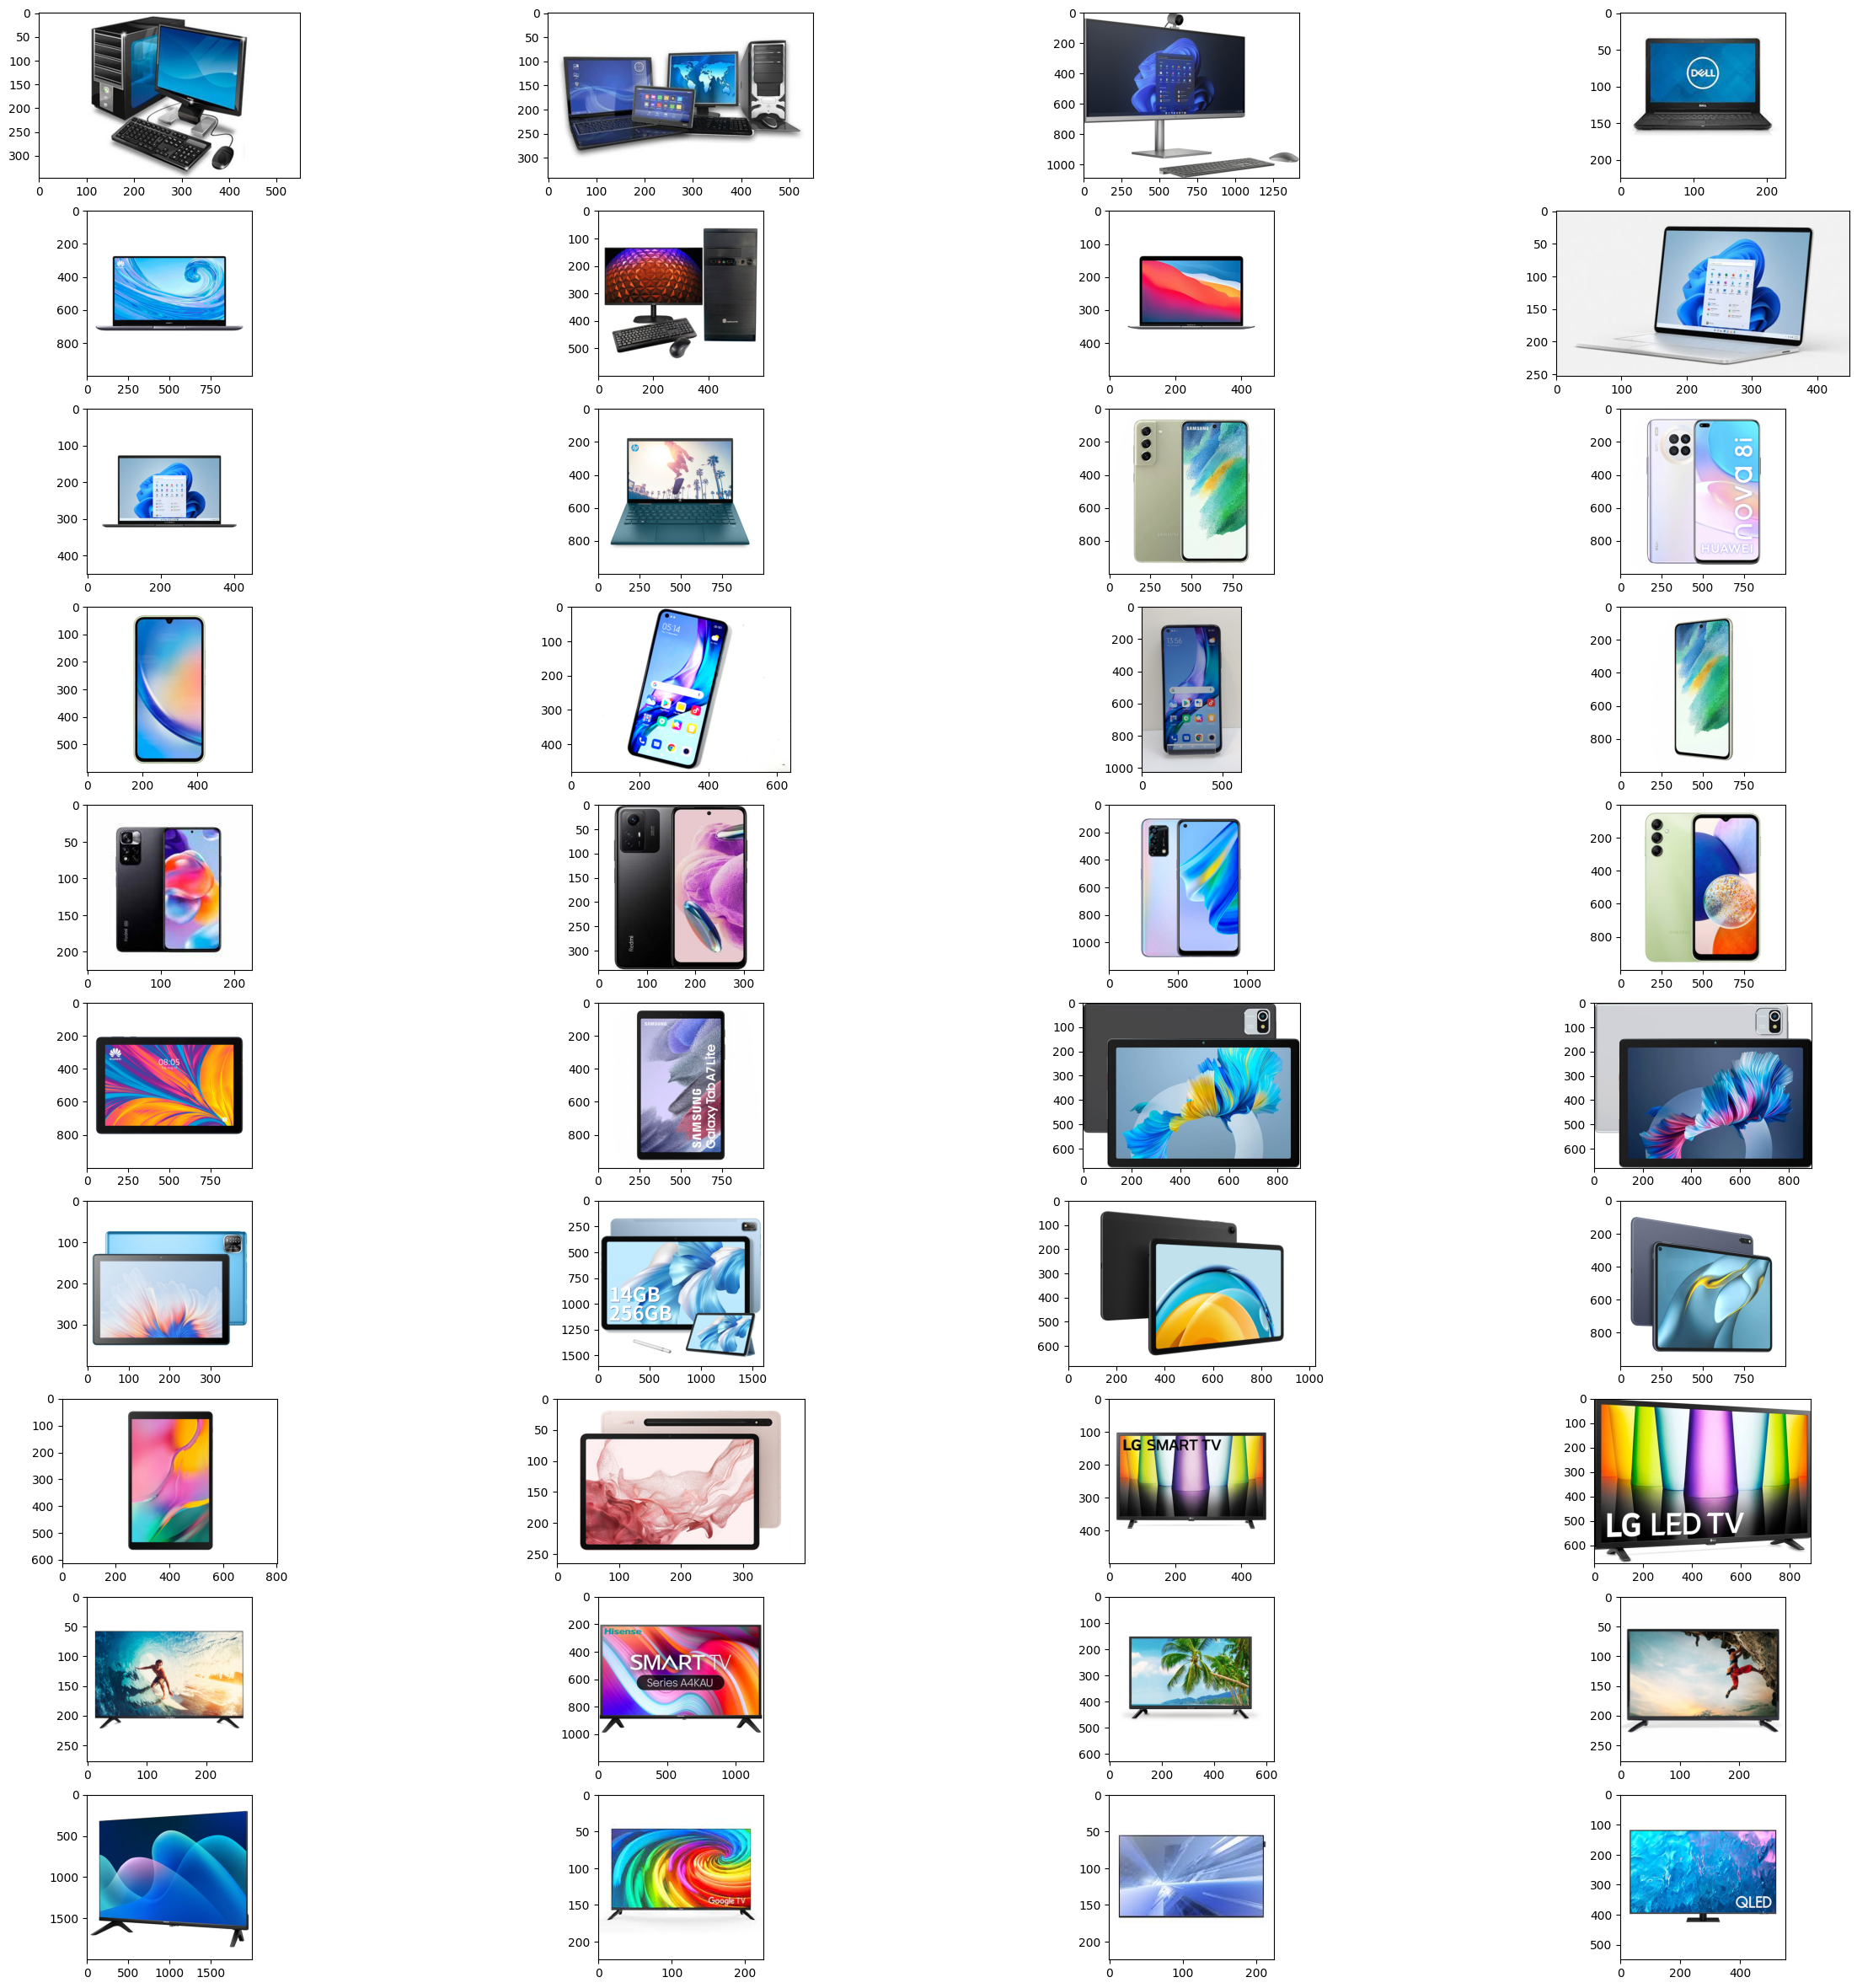

In [5]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(30, 30))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    plt.imshow(imread(train_path+"image"+str(i) + ".jpeg"))

plt.show()

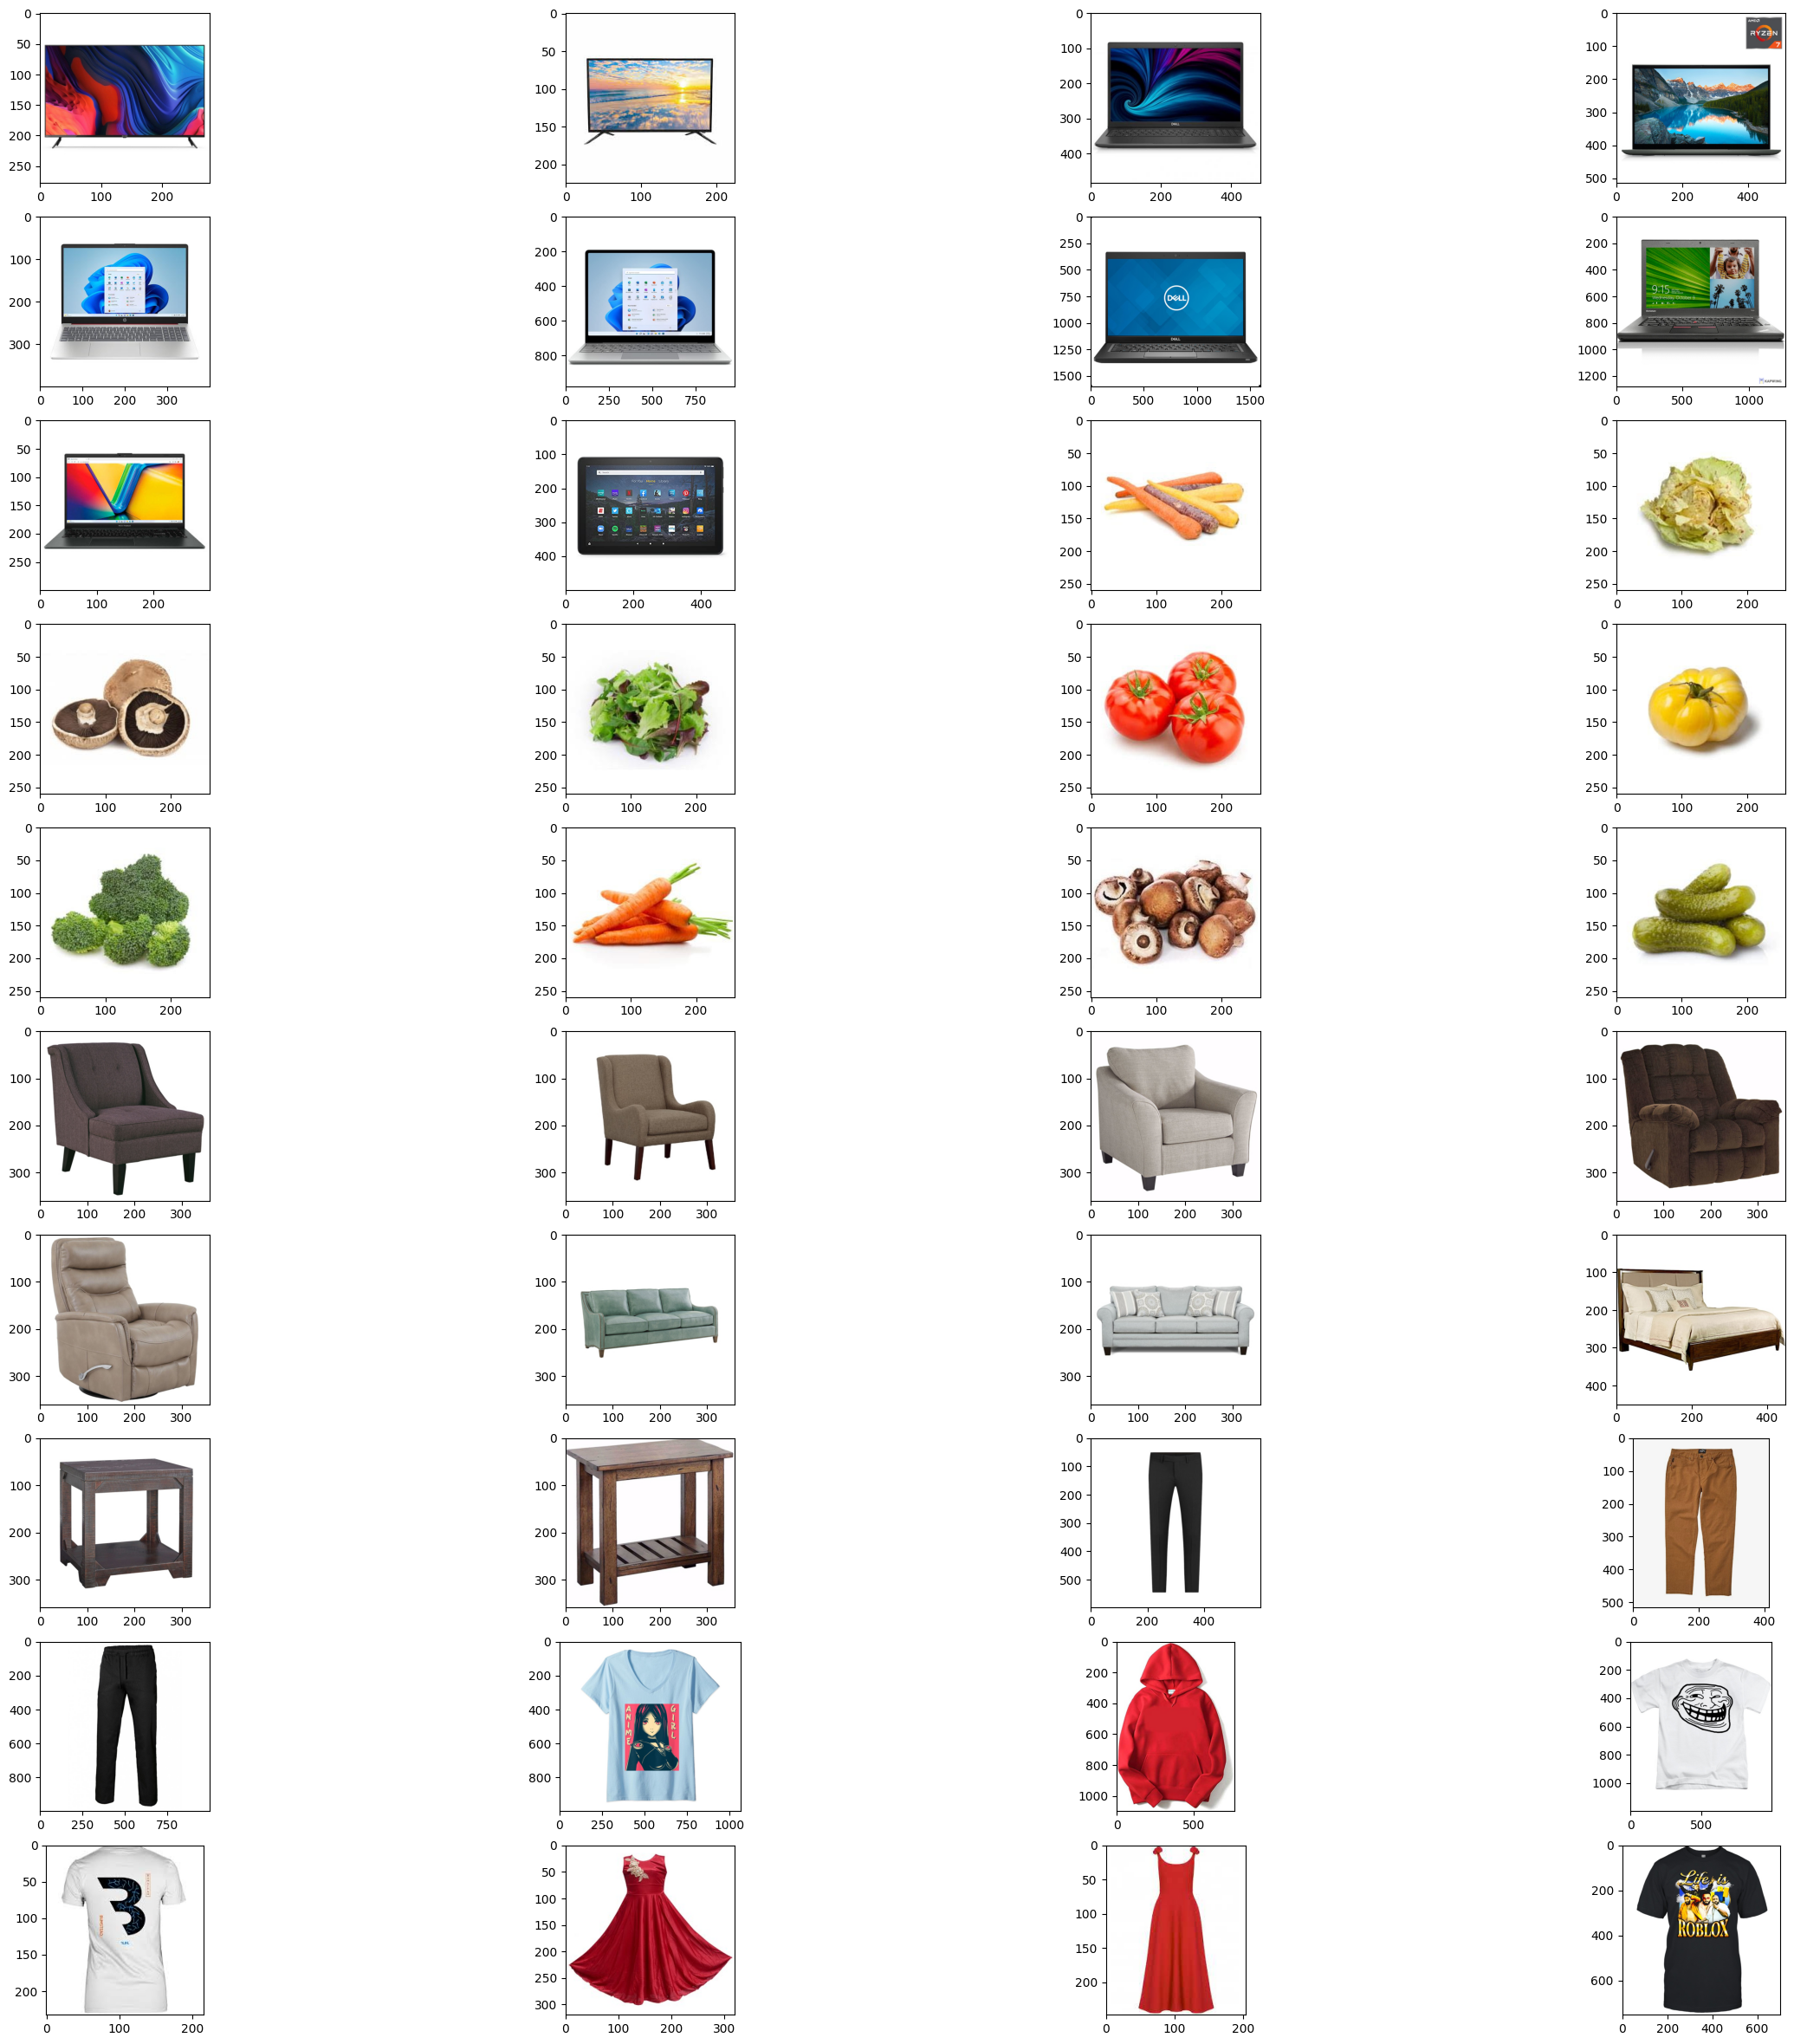

In [6]:
# Visualizando las imagenes de prueba
plt.figure(figsize=(30, 30))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    plt.imshow(imread(test_path+"test_image"+str(i) + ".jpeg"))

plt.show()

In [7]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [8]:
df_train

name  category
0      image1         0
1      image2         0
2      image3         0
3      image4         0
4      image5         0
..        ...       ...
635  image636         3
636  image637         3
637  image638         3
638  image639         3
639  image640         3

[640 rows x 2 columns]

In [9]:
df_test

name  category
0      test_image1         0
1      test_image2         0
2      test_image3         0
3      test_image4         0
4      test_image5         0
..             ...       ...
115  test_image116         3
116  test_image117         3
117  test_image118         3
118  test_image119         3
119  test_image120         3

[120 rows x 2 columns]

In [10]:
labels=[0,1,2,3]
for i in range(len(labels)):
    label = str(i)
    try:
        os.mkdir(train_path + label)
        os.mkdir(test_path + label)
    except OSError:
        pass

In [11]:
# Copiando las imagenes a sus respectivas carpetas
def image_copy(df, path):
    for i in tqdm(range(len(df["name"]))):
        img = df["name"].iloc[i]
        if(df["category"].iloc[i]==0):
            shutil.copy(path+img+".jpeg",path+"0")
        elif(df["category"].iloc[i]==1):
            shutil.copy(path+img+".jpeg",path+"1")
        elif(df["category"].iloc[i]==2):
            shutil.copy(path+img+".jpeg",path+"2")
        elif(df["category"].iloc[i]==3):
            shutil.copy(path+img+".jpeg",path+"3")
    
    print("\nCopiado de imagenes completado para la carpeta: ", path)

image_copy(df_train, train_path)
image_copy(df_test, test_path)

100%|██████████| 640/640 [00:00<00:00, 873.13it/s]



Copiado de imagenes completado para la carpeta:  ./dataset/images/train/


100%|██████████| 120/120 [00:00<00:00, 816.32it/s]


Copiado de imagenes completado para la carpeta:  ./dataset/images/test/


In [12]:
categories = {
    "0": "Tecnologia",
    "1": "Alimentos",
    "2": "Mobiliario",
    "3": "Prendas"
}

In [13]:
df_train["category"] = df_train["category"].astype(str)
df_test["category"] = df_test["category"].astype(str)

In [14]:
# Reemplazando los valores de las categorias por su nombre
df_train["category"] = df_train["category"].replace(categories)
df_test["category"] = df_test["category"].replace(categories)

In [15]:
df_train

name    category
0      image1  Tecnologia
1      image2  Tecnologia
2      image3  Tecnologia
3      image4  Tecnologia
4      image5  Tecnologia
..        ...         ...
635  image636     Prendas
636  image637     Prendas
637  image638     Prendas
638  image639     Prendas
639  image640     Prendas

[640 rows x 2 columns]

In [16]:
df_test

name    category
0      test_image1  Tecnologia
1      test_image2  Tecnologia
2      test_image3  Tecnologia
3      test_image4  Tecnologia
4      test_image5  Tecnologia
..             ...         ...
115  test_image116     Prendas
116  test_image117     Prendas
117  test_image118     Prendas
118  test_image119     Prendas
119  test_image120     Prendas

[120 rows x 2 columns]

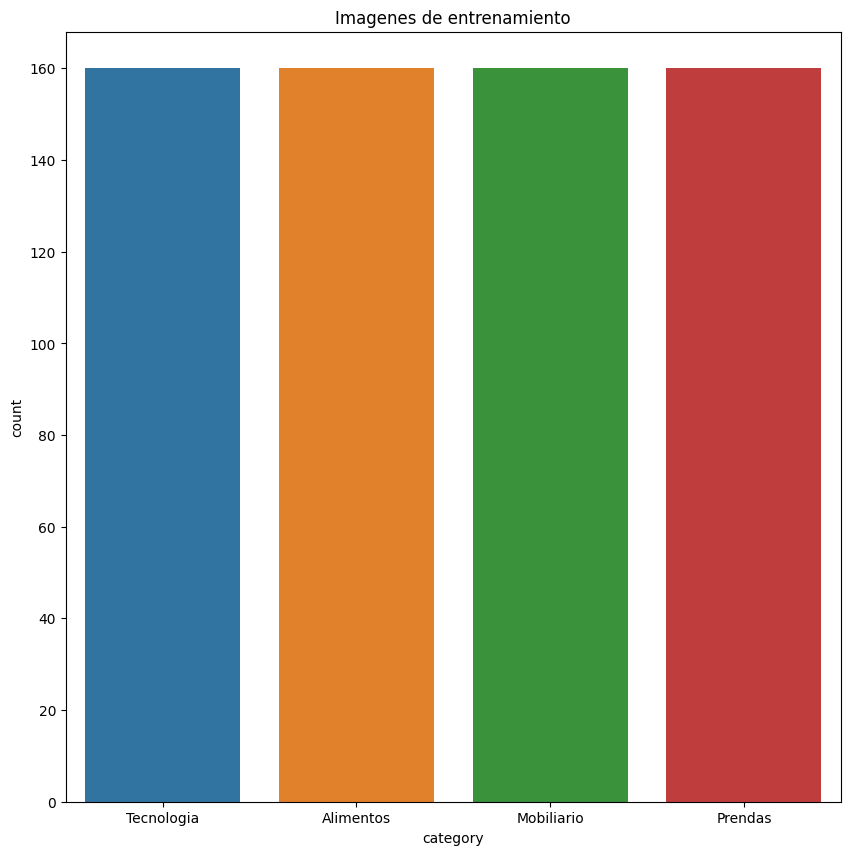

In [17]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(10, 10))
sns.countplot(df_train["category"], x=df_train["category"])
plt.title("Imagenes de entrenamiento")
plt.show()

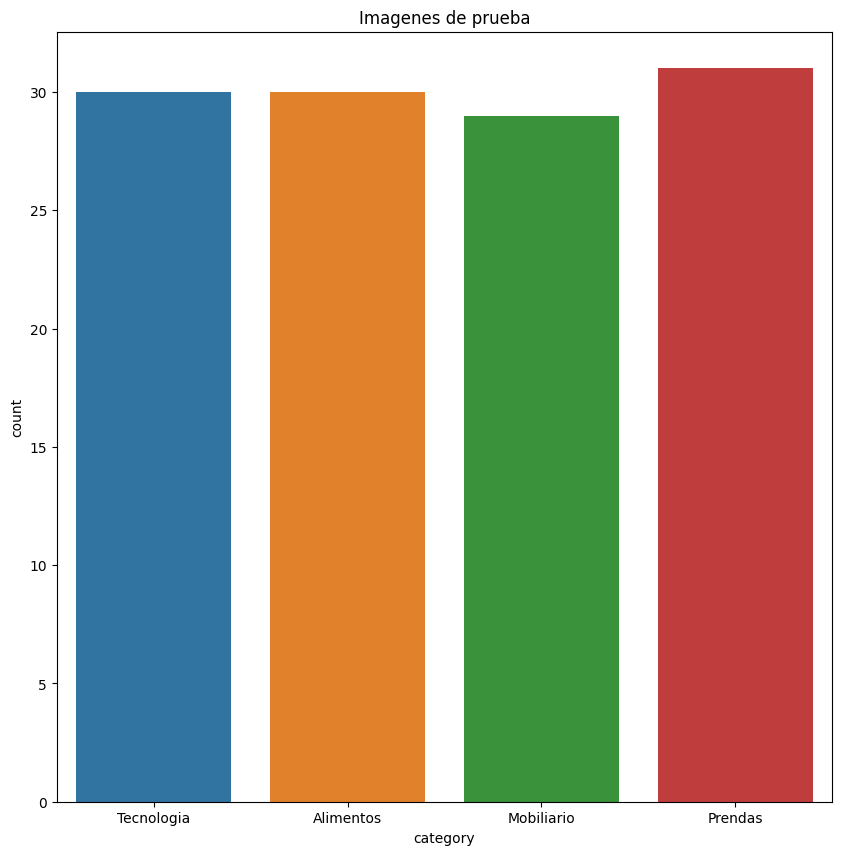

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(df_test["category"], x=df_test["category"])
plt.title("Imagenes de prueba")
plt.show()

In [19]:
# Promedios de largo y ancho de las imagenes
width = []
height = []
for i in range(1, train_length+1):
    img = imread(train_path+"image"+str(i)+".jpeg")
    width.append(img.shape[0])
    height.append(img.shape[1])

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


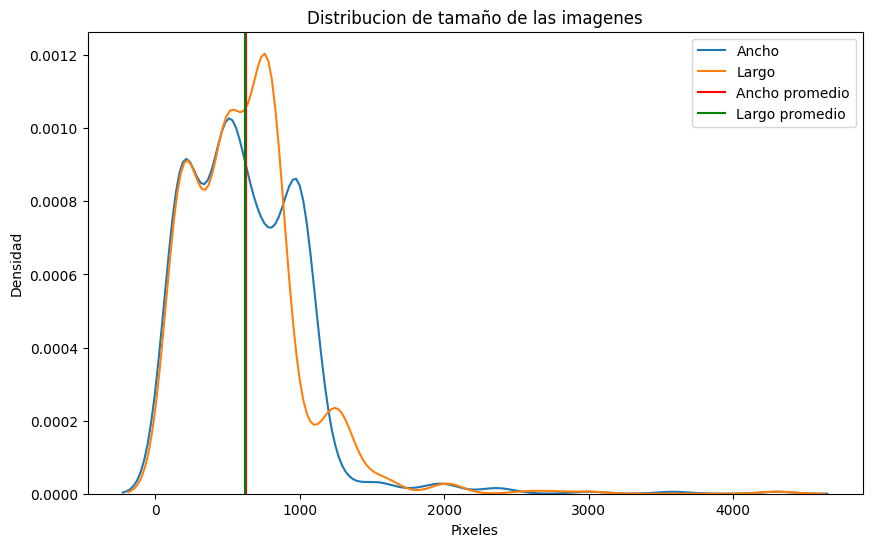

In [20]:
# Visualizando los promedios de largo y ancho de las imagenes
plt.figure(figsize=(10, 6))
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
sns.kdeplot(width, label='Ancho')
sns.kdeplot(height, label='Largo')
plt.axvline(np.mean(width),color='r',label='Ancho promedio')
plt.axvline(np.mean(height), color='g',label='Largo promedio')
plt.xlabel('Pixeles')
plt.ylabel('Densidad')
plt.title('Distribucion de tamaño de las imagenes')
plt.legend()
plt.show()

In [21]:
# Calculando el promedio de largo y ancho de las imagenes
avg_width = np.mean(width)
avg_height = np.mean(height)

print("Ancho promedio: ", avg_width)
print("Largo promedio: ", avg_height)

Ancho promedio:  624.9625
Largo promedio:  617.253125


In [39]:
imgSize = (int(avg_width), int(avg_height))

# Reescalando las imagenes
train_datagen=ImageDataGenerator(rescale = 1/255,
                                 rotation_range=0.5,
                                 width_shift_range=0.3,
                                 shear_range = 0.2,
                                 height_shift_range=0.3,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1/255)

Found 640 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


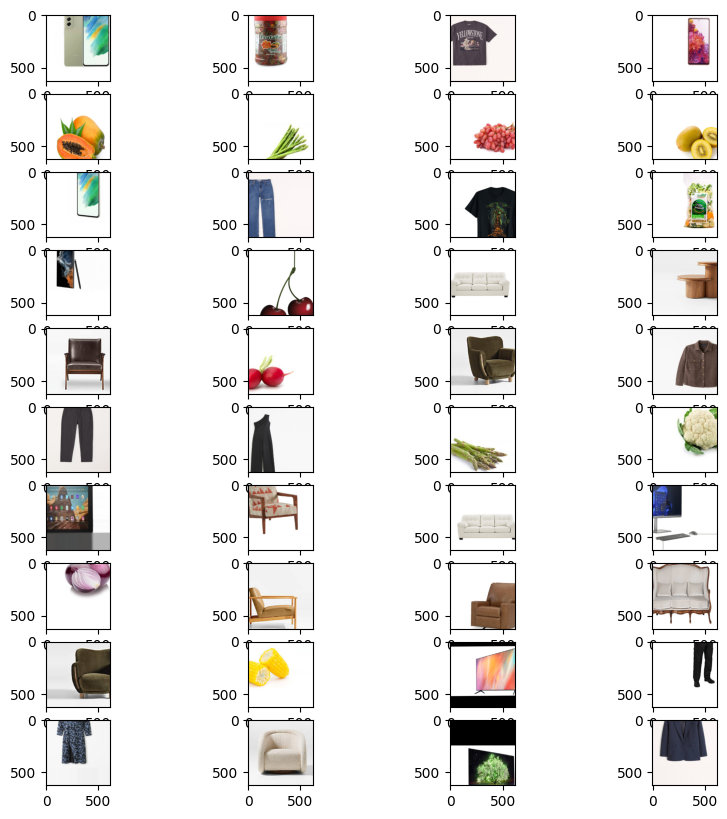

In [40]:
training_set =train_datagen.flow_from_directory(train_path,
                                                target_size=imgSize,
                                                batch_size=32,
                                                class_mode='categorical')
                                                 

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=imgSize,
                                            batch_size=12,
                                            class_mode='categorical'
                                            shuffle=False)


# View trainig set images
plt.figure(figsize=(10, 10))
for i in range(1, 41):
    plt.subplot(10, 4, i)
    for X_batch, Y_batch in training_set:
        image = X_batch[0]
        plt.imshow(image)
        break

### Entrenamiento de modelo

In [41]:
# Funciones utiles
def plot_loss(history): # Funcion para graficar la perdida
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()

def plot_accuracy(history): # Funcion para graficar la precision
  plt.plot(history.history['accuracy'], label='train acc')
  plt.plot(history.history['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()


In [42]:
epochs = 20 # Numero de epocas

#### CNN (1 Capa Convolucional, 1 Capa Pooling)

In [43]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.0001
    )

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(4, activation = 'softmax'))
model1.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 311, 307, 32)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3055264)           0         
                                                                 
 dense_6 (Dense)             (None, 64)                195536960 
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 195538116 (745.92 MB)
Trainable params: 195538116 (745.92 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [44]:
# Entrenamiento de model1

history1 = model1.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

# TIEMPO DE ENTRENAMIENTO: 12:07.7 mins

Epoch 1/20
20/20 [==============================] - 101s 5s/step - loss: 174.6460 - accuracy: 0.3141 - val_loss: 15.4287 - val_accuracy: 0.4333
Epoch 2/20
20/20 [==============================] - 85s 4s/step - loss: 4.7707 - accuracy: 0.5188 - val_loss: 3.0025 - val_accuracy: 0.5583
Epoch 3/20
20/20 [==============================] - 87s 4s/step - loss: 1.4675 - accuracy: 0.5656 - val_loss: 1.3547 - val_accuracy: 0.7167
Epoch 4/20
20/20 [==============================] - 82s 4s/step - loss: 1.0993 - accuracy: 0.6375 - val_loss: 1.4239 - val_accuracy: 0.7167
Epoch 5/20
20/20 [==============================] - 85s 4s/step - loss: 1.0146 - accuracy: 0.6531 - val_loss: 1.4767 - val_accuracy: 0.7417
Epoch 6/20
20/20 [==============================] - 86s 4s/step - loss: 0.9232 - accuracy: 0.6859 - val_loss: 1.4693 - val_accuracy: 0.7333
Epoch 7/20
20/20 [==============================] - 86s 4s/step - loss: 0.8380 - accuracy: 0.6828 - val_loss: 1.5912 - val_accuracy: 0.7333
Epoch 8/20
20/20

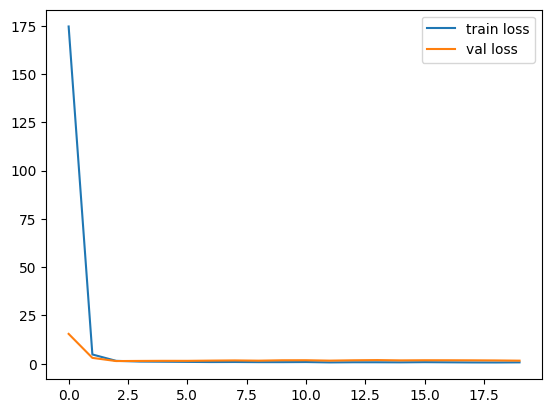

In [45]:
plot_loss(history1)

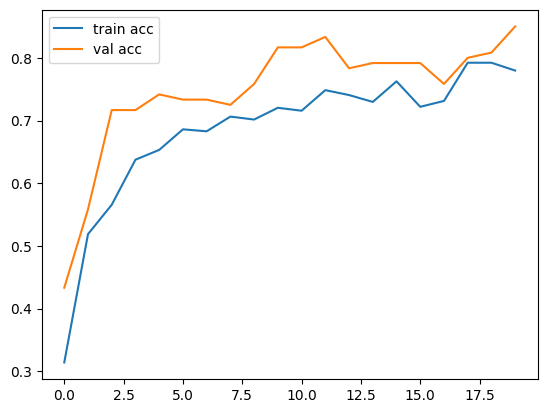

In [46]:
plot_accuracy(history1)

In [47]:
results1 = model1.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results1[0])
print("Accuracy", results1[1])

Loss:  1.561805248260498
Accuracy 0.8500000238418579


#### CNN (2 Capas Convolucionales, 2 Capas Pooling)

In [48]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))
model2.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 311, 307, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 309, 305, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 154, 152, 64)      0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1498112)           0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [49]:
# Aqui va el entrenamiento de model2

history2 = model2.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

# TIEMPO DE ENTRENAMIENTO: 15:08.1 mins

Epoch 1/20
20/20 [==============================] - 116s 6s/step - loss: 14.3935 - accuracy: 0.3328 - val_loss: 1.0679 - val_accuracy: 0.6167
Epoch 2/20
20/20 [==============================] - 117s 6s/step - loss: 1.0974 - accuracy: 0.5828 - val_loss: 1.0332 - val_accuracy: 0.6750
Epoch 3/20
20/20 [==============================] - 118s 6s/step - loss: 1.0231 - accuracy: 0.6391 - val_loss: 1.0427 - val_accuracy: 0.7000
Epoch 4/20
20/20 [==============================] - 116s 6s/step - loss: 0.9412 - accuracy: 0.6469 - val_loss: 1.1970 - val_accuracy: 0.7000
Epoch 5/20
20/20 [==============================] - 117s 6s/step - loss: 0.8588 - accuracy: 0.6516 - val_loss: 1.2986 - val_accuracy: 0.6417
Epoch 6/20
20/20 [==============================] - 116s 6s/step - loss: 0.8544 - accuracy: 0.6703 - val_loss: 1.2825 - val_accuracy: 0.7417
Epoch 7/20
20/20 [==============================] - 105s 5s/step - loss: 0.8003 - accuracy: 0.7109 - val_loss: 1.5043 - val_accuracy: 0.7750
Epoch 8/20
2

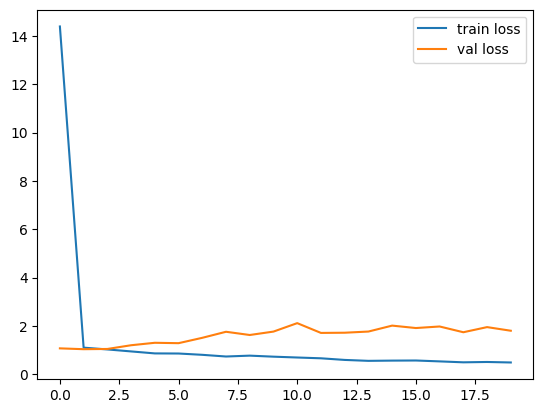

In [50]:
plot_loss(history2)

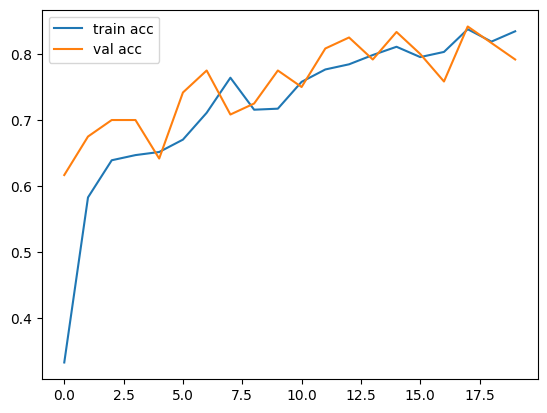

In [51]:
plot_accuracy(history2)

In [52]:
results2 = model2.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results2[0])
print("Accuracy", results2[1])

Loss:  1.7973378896713257
Accuracy 0.7916666865348816


#### CNN (3 Capas Convolucionales, 3 Capas Pooling)

In [53]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(4, activation = 'softmax'))
model3.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 311, 307, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 309, 305, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 154, 152, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 152, 150, 128)     73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 76, 75, 128)      

In [55]:
# Aqui va el entrenamiento de model3

history3 = model3.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

# TIEMPO DE ENTRENAMIENTO: 15:51.2 mins

Epoch 1/20
 5/20 [======>.......................] - ETA: 1:44 - loss: 5.5350 - accuracy: 0.3750

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/20 [===============>..............] - ETA: 1:00 - loss: 3.2448 - accuracy: 0.3608

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


20/20 [==============================] - 142s 7s/step - loss: 2.3273 - accuracy: 0.4203 - val_loss: 0.9868 - val_accuracy: 0.6500
Epoch 2/20
20/20 [==============================] - 134s 7s/step - loss: 0.9713 - accuracy: 0.6266 - val_loss: 1.2702 - val_accuracy: 0.6583
Epoch 3/20
20/20 [==============================] - 135s 7s/step - loss: 0.8985 - accuracy: 0.6562 - val_loss: 1.3141 - val_accuracy: 0.7167
Epoch 4/20
20/20 [==============================] - 135s 7s/step - loss: 0.7588 - accuracy: 0.7031 - val_loss: 1.8152 - val_accuracy: 0.7750
Epoch 5/20
20/20 [==============================] - 132s 7s/step - loss: 0.7672 - accuracy: 0.7078 - val_loss: 1.7127 - val_accuracy: 0.7750
Epoch 6/20
20/20 [==============================] - 123s 6s/step - loss: 0.6974 - accuracy: 0.7594 - val_loss: 2.0290 - val_accuracy: 0.7917
Epoch 7/20
20/20 [==============================] - 118s 6s/step - loss: 0.6554 - accuracy: 0.7469 - val_loss: 1.7003 - val_accuracy: 0.8250
Epoch 8/20
20/20 [======

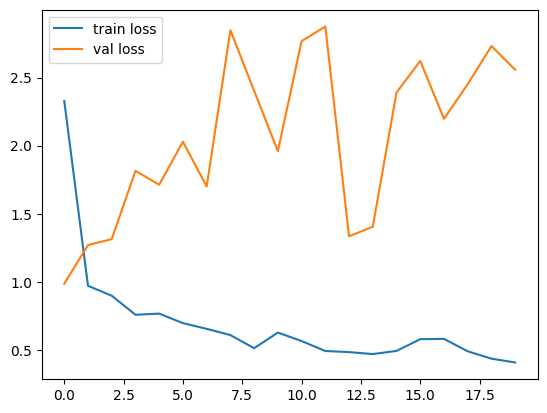

In [56]:
plot_loss(history3) 

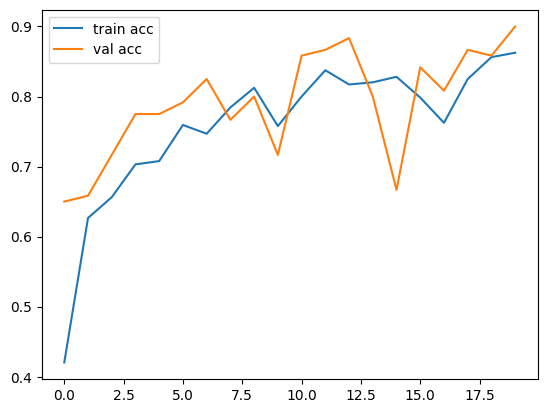

In [57]:
plot_accuracy(history3)

In [58]:
results3 = model3.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results3[0])
print("Accuracy", results3[1])

Loss:  2.5571489334106445
Accuracy 0.8999999761581421


#### CNN (Transfer Learning)

In [59]:
# Usar resnet50 para el modelo 4
# Cargando los pesos de resnet50
resnet = ResNet50(input_shape= (imgSize[0], imgSize[1], 3), weights='imagenet', include_top=False)
for i in resnet.layers:
    i.trainable=False
x = Flatten()(resnet.output)
prediction = Dense(4, activation='softmax')(x)
model4 = Model(inputs=resnet.input, outputs=prediction)
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 624, 617, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 630, 623, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 312, 309, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 312, 309, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [60]:
model4.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [61]:
# Aqui va el entrenamiento de model4
history4 = model4.fit(training_set,                
                    validation_data=test_set,
                    epochs=epochs)

# TIEMPO DE ENTRENAMIENTO: 26:11.9 mins

Epoch 1/20
20/20 [==============================] - 206s 10s/step - loss: 244.1141 - accuracy: 0.2547 - val_loss: 134.6357 - val_accuracy: 0.2750
Epoch 2/20
20/20 [==============================] - 204s 10s/step - loss: 95.5926 - accuracy: 0.3125 - val_loss: 24.9616 - val_accuracy: 0.5583
Epoch 3/20
20/20 [==============================] - 205s 10s/step - loss: 32.7088 - accuracy: 0.4797 - val_loss: 10.9315 - val_accuracy: 0.6083
Epoch 4/20
20/20 [==============================] - 203s 10s/step - loss: 12.8505 - accuracy: 0.5641 - val_loss: 18.4474 - val_accuracy: 0.5167
Epoch 5/20
20/20 [==============================] - 201s 10s/step - loss: 13.7346 - accuracy: 0.5813 - val_loss: 11.0975 - val_accuracy: 0.6833
Epoch 6/20
20/20 [==============================] - 217s 11s/step - loss: 16.2225 - accuracy: 0.5500 - val_loss: 26.5607 - val_accuracy: 0.6833
Epoch 7/20
20/20 [==============================] - 227s 11s/step - loss: 24.4345 - accuracy: 0.4828 - val_loss: 9.4027 - val_accuracy

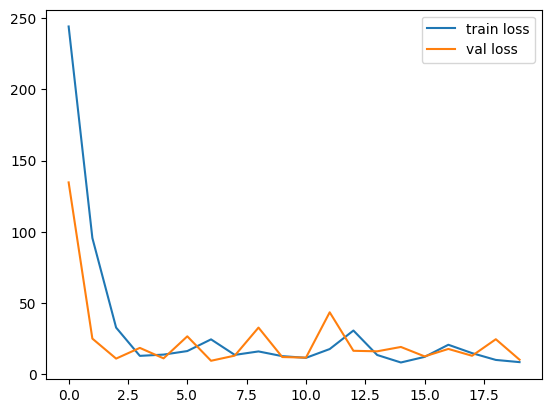

In [62]:
plot_loss(history4)


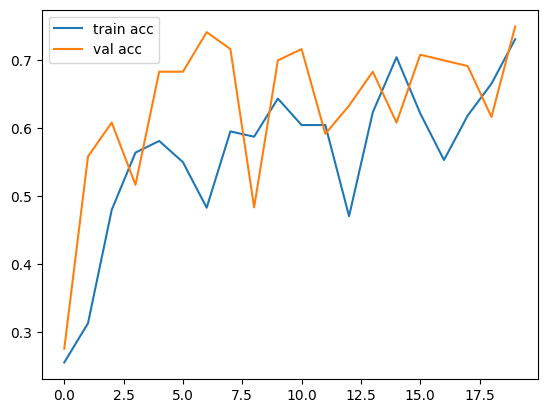

In [63]:
plot_accuracy(history4)

In [64]:
results4 = model4.evaluate(test_set, steps=len(test_set), verbose=0)

In [65]:
# Guardando los modelos
model1.save(modelpath + "iter_2_model1.h5")
model2.save(modelpath + "iter_2_model2.h5")
model3.save(modelpath + "iter_2_model3.h5")
model4.save(modelpath + "iter_2_model4.h5")

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
model1.save(modelpath + "iter_2_model1.keras")

In [67]:
model2.save(modelpath + "iter_2_model2.keras")

In [68]:
model3.save(modelpath + "iter_2_model3.keras")

In [69]:
model4.save(modelpath + "iter_2_model4.keras")

### Resultados Finales

In [70]:
modelos = ['CNN 1 capa', 'CNN 2 capas', 'CNN 3 capas', 'ResNet50']
model_acc = [results1[1], results2[1], results3[1], results4[1]]

data = [modelos, model_acc]
columns = ['Modelo', 'Precision']

summary = pd.DataFrame(np.column_stack(data), columns=columns)

In [71]:
summary

Modelo           Precision
0   CNN 1 capa  0.8500000238418579
1  CNN 2 capas  0.7916666865348816
2  CNN 3 capas  0.8999999761581421
3     ResNet50                0.75

In [72]:
model_loss = [results1[0], results2[0], results3[0], results4[0]]
data = [modelos, model_loss]
columns = ['Modelo', 'Perdida']

summary_loss = pd.DataFrame(np.column_stack(data), columns=columns)

In [73]:
summary_loss

Modelo             Perdida
0   CNN 1 capa   1.561805248260498
1  CNN 2 capas  1.7973378896713257
2  CNN 3 capas  2.5571489334106445
3     ResNet50  10.146321296691895

## Testeo con modelo con CNN (2 Capas) vs. Transfer Learning (ResNet-50)

In [74]:
epochs = 50 # Numero de epocas

In [75]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.0001
    )

### CNN (1 Capa)

In [76]:
model_cnn_1 = Sequential()
model_cnn_1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model_cnn_1.add(MaxPooling2D((2, 2)))
model_cnn_1.add(Flatten())
model_cnn_1.add(Dense(64, activation = 'relu'))
model_cnn_1.add(Dense(4, activation = 'softmax'))
model_cnn_1.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model_cnn_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 311, 307, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 3055264)           0         
                                                                 
 dense_13 (Dense)            (None, 64)                195536960 
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 195538116 (745.92 MB)
Trainable params: 195538116 (745.92 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [77]:
history_cnn_1 = model_cnn_1.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

Epoch 1/50
 3/20 [===>..........................] - ETA: 1:52 - loss: 180.0919 - accuracy: 0.2292

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


12/20 [=================>............] - ETA: 34s - loss: 115.4316 - accuracy: 0.2812

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 94s 4s/step - loss: 81.4579 - accuracy: 0.2812 - val_loss: 12.2147 - val_accuracy: 0.4417
Epoch 2/50
20/20 [==============================] - 78s 4s/step - loss: 4.0678 - accuracy: 0.4141 - val_loss: 1.5053 - val_accuracy: 0.4667
Epoch 3/50
20/20 [==============================] - 79s 4s/step - loss: 1.3244 - accuracy: 0.4125 - val_loss: 1.2343 - val_accuracy: 0.4833
Epoch 4/50
20/20 [==============================] - 78s 4s/step - loss: 1.2414 - accuracy: 0.4484 - val_loss: 1.2368 - val_accuracy: 0.6000
Epoch 5/50
20/20 [==============================] - 78s 4s/step - loss: 1.1093 - accuracy: 0.5344 - val_loss: 1.4840 - val_accuracy: 0.5583
Epoch 6/50
20/20 [==============================] - 79s 4s/step - loss: 1.0805 - accuracy: 0.5750 - val_loss: 1.6346 - val_accuracy: 0.6167
Epoch 7/50
20/20 [==============================] - 77s 4s/step - loss: 1.0428 - accuracy: 0.5656 - val_loss: 1.3916 - val_accuracy: 0.6833
Epoch 8/50
20/20 [===========

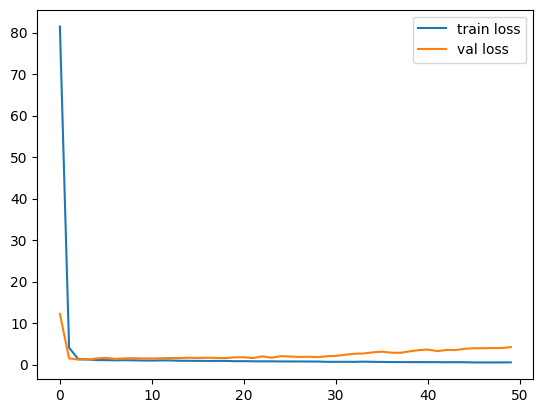

In [78]:
plot_loss(history_cnn_1)

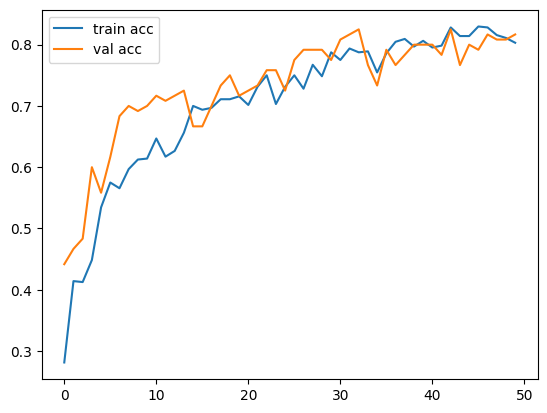

In [79]:
plot_accuracy(history_cnn_1)

In [80]:
results_cnn_1 = model_cnn_1.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results_cnn_1[0])
print("Accuracy", results_cnn_1[1])

Loss:  4.2409186363220215
Accuracy 0.8166666626930237


### CNN (2 Capas)

In [81]:
model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model_cnn_2.add(MaxPooling2D((2, 2)))
model_cnn_2.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn_2.add(MaxPooling2D((2, 2)))
model_cnn_2.add(Flatten())
model_cnn_2.add(Dense(64, activation = 'relu'))
model_cnn_2.add(Dense(4, activation = 'softmax'))
model_cnn_2.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model_cnn_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 311, 307, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 309, 305, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 154, 152, 64)      0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 1498112)           0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [82]:
history_cnn_2 = model_cnn_2.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

Epoch 1/50
20/20 [==============================] - 103s 5s/step - loss: 27.3003 - accuracy: 0.3922 - val_loss: 1.1059 - val_accuracy: 0.4750
Epoch 2/50
20/20 [==============================] - 103s 5s/step - loss: 1.1486 - accuracy: 0.5422 - val_loss: 1.2154 - val_accuracy: 0.6083
Epoch 3/50
20/20 [==============================] - 102s 5s/step - loss: 1.0599 - accuracy: 0.5922 - val_loss: 1.3764 - val_accuracy: 0.7500
Epoch 4/50
20/20 [==============================] - 102s 5s/step - loss: 1.0308 - accuracy: 0.6609 - val_loss: 1.5516 - val_accuracy: 0.7583
Epoch 5/50
20/20 [==============================] - 102s 5s/step - loss: 0.9134 - accuracy: 0.6875 - val_loss: 1.7380 - val_accuracy: 0.7333
Epoch 6/50
20/20 [==============================] - 101s 5s/step - loss: 0.9385 - accuracy: 0.6859 - val_loss: 1.8055 - val_accuracy: 0.6750
Epoch 7/50
20/20 [==============================] - 103s 5s/step - loss: 0.8334 - accuracy: 0.7063 - val_loss: 2.4384 - val_accuracy: 0.6500
Epoch 8/50
2

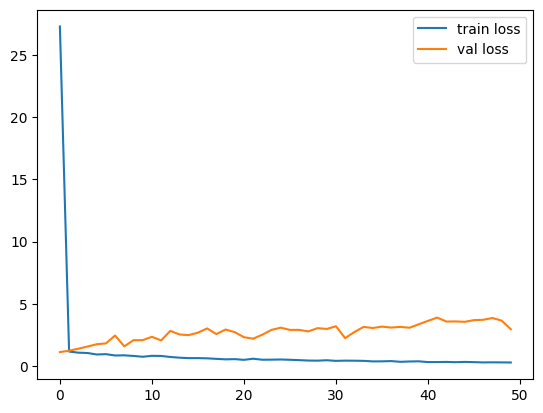

In [83]:
plot_loss(history_cnn_2)

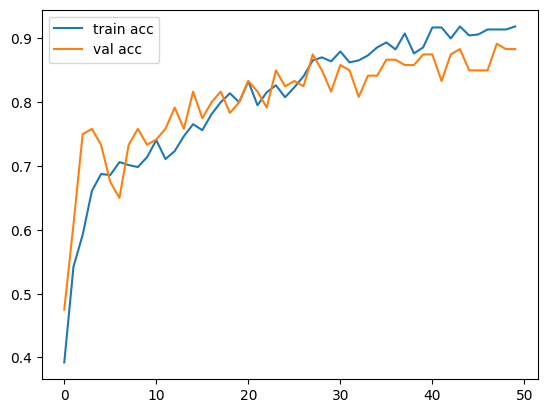

In [84]:
plot_accuracy(history_cnn_2)

In [85]:
results_cnn_2 = model_cnn_2.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results_cnn_2[0])
print("Accuracy", results_cnn_2[1])

Loss:  2.945077419281006
Accuracy 0.8833333253860474


### CNN (3 capas)

In [86]:
model_cnn_3 = Sequential()
model_cnn_3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (imgSize[0], imgSize[1], 3)))
model_cnn_3.add(MaxPooling2D((2, 2)))
model_cnn_3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn_3.add(MaxPooling2D((2, 2)))
model_cnn_3.add(Conv2D(128, (3, 3), activation = 'relu'))
model_cnn_3.add(MaxPooling2D((2, 2)))
model_cnn_3.add(Flatten())
model_cnn_3.add(Dense(64, activation = 'relu'))
model_cnn_3.add(Dense(4, activation = 'softmax'))
model_cnn_3.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model_cnn_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 622, 615, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 311, 307, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 309, 305, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 154, 152, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 152, 150, 128)     73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 76, 75, 128)      

In [87]:
history_cnn_3 = model_cnn_3.fit(training_set,
                                validation_data=test_set,
                                epochs=epochs)

Epoch 1/50
20/20 [==============================] - 118s 6s/step - loss: 5.8725 - accuracy: 0.3516 - val_loss: 1.2440 - val_accuracy: 0.5917
Epoch 2/50
20/20 [==============================] - 116s 6s/step - loss: 1.0741 - accuracy: 0.5469 - val_loss: 1.5803 - val_accuracy: 0.6417
Epoch 3/50
20/20 [==============================] - 115s 6s/step - loss: 1.0280 - accuracy: 0.6000 - val_loss: 2.6304 - val_accuracy: 0.6333
Epoch 4/50
20/20 [==============================] - 115s 6s/step - loss: 0.9406 - accuracy: 0.6375 - val_loss: 1.6008 - val_accuracy: 0.7583
Epoch 5/50
20/20 [==============================] - 115s 6s/step - loss: 0.8424 - accuracy: 0.6844 - val_loss: 1.8691 - val_accuracy: 0.7833
Epoch 6/50
20/20 [==============================] - 115s 6s/step - loss: 0.7815 - accuracy: 0.7125 - val_loss: 2.4570 - val_accuracy: 0.7583
Epoch 7/50
20/20 [==============================] - 115s 6s/step - loss: 0.7465 - accuracy: 0.7188 - val_loss: 2.3569 - val_accuracy: 0.7833
Epoch 8/50
20

In [ ]:
plot_loss(history_cnn_3)

In [ ]:
plot_accuracy(history_cnn_3)

In [ ]:
results_cnn_3 = model_cnn_3.evaluate(test_set, steps=len(test_set), verbose=0)
print("Loss: ", results_cnn_3[0])
print("Accuracy", results_cnn_3[1])

### Transfer Learning (ResNet-50)

In [ ]:
resnet = ResNet50(input_shape= (imgSize[0], imgSize[1], 3), weights='imagenet', include_top=False)
for i in resnet.layers:
    i.trainable=False
x = Flatten()(resnet.output)
prediction = Dense(4, activation='softmax')(x)
resnet_model = Model(inputs=resnet.input, outputs=prediction)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 700, 715, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 706, 721, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 350, 358, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 350, 358, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(training_set,                
                    validation_data=test_set,
                    epochs=epochs)

Epoch 1/50
7/7 [==============================] - 77s 11s/step - loss: 408.1531 - accuracy: 0.2750 - val_loss: 408.6399 - val_accuracy: 0.2500
Epoch 2/50
7/7 [==============================] - 75s 11s/step - loss: 354.6045 - accuracy: 0.3125 - val_loss: 289.6849 - val_accuracy: 0.2500
Epoch 3/50
7/7 [==============================] - 75s 11s/step - loss: 225.5253 - accuracy: 0.3000 - val_loss: 231.5684 - val_accuracy: 0.2750
Epoch 4/50
7/7 [==============================] - 74s 12s/step - loss: 144.0689 - accuracy: 0.4563 - val_loss: 147.6980 - val_accuracy: 0.2250
Epoch 5/50
7/7 [==============================] - 74s 12s/step - loss: 115.4286 - accuracy: 0.4000 - val_loss: 82.3940 - val_accuracy: 0.2750
Epoch 6/50
7/7 [==============================] - 73s 12s/step - loss: 56.4487 - accuracy: 0.4125 - val_loss: 35.2275 - val_accuracy: 0.4000
Epoch 7/50
7/7 [==============================] - 75s 11s/step - loss: 34.7193 - accuracy: 0.5250 - val_loss: 44.0398 - val_accuracy: 0.4000
Epoc

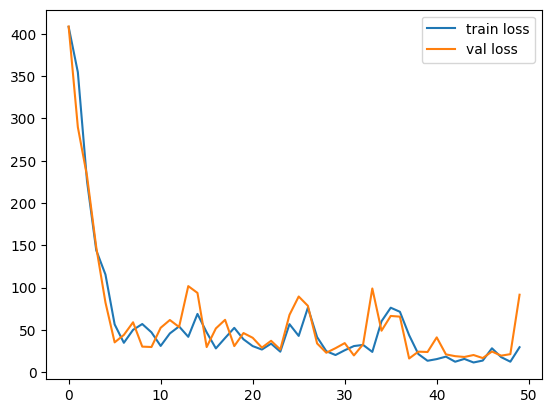

In [ ]:
plot_loss(history_resnet)

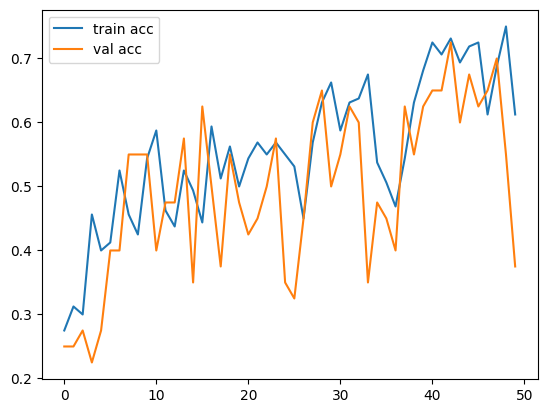

In [ ]:
plot_accuracy(history_resnet)

In [ ]:
results_resnet = resnet_model.evaluate(test_set, steps=len(test_set), verbose=0)

In [ ]:
model_cnn_1.save(modelpath + "iter_2_model_cnn_1.h5")
model_cnn_2.save(modelpath + "iter_2_model_cnn_2.h5")
resnet_model.save(modelpath + "iter_2_resnet_model.h5")
model_cnn_3.save(modelpath + "iter_2_model_cnn_3.h5")

model_cnn_1.save(modelpath + "iter_2_model_cnn_1.keras")
model_cnn_2.save(modelpath + "iter_2_model_cnn_2.keras")
resnet_model.save(modelpath + "iter_2_resnet_model.keras")
model_cnn_3.save(modelpath + "iter_2_model_cnn_3.keras")

c:\Users\Andrès DLR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
modelos_2 = ['CNN 1 Capa', 'CNN 2 capas', 'CNN 3 capas', 'ResNet50']
model_acc_2 = [results_cnn_1[1], results_cnn_2[1], results_cnn_3[1], results_resnet[1]]

data_2 = [modelos_2, model_acc_2]
columns_2 = ['Modelo', 'Precision']

summary_2 = pd.DataFrame(np.column_stack(data_2), columns=columns_2)


In [ ]:
summary_2

Modelo Precision
0  CNN 2 capas      0.75
1     ResNet50     0.375

In [ ]:
model_loss_2 = [results_cnn_1[0], results_cnn_2[0], results_cnn_3[0], results_resnet[0]]

data_2 = [modelos_2, model_loss_2]
columns_2 = ['Modelo', 'Perdida']

summary_loss_2 = pd.DataFrame(np.column_stack(data_2), columns=columns_2)

In [ ]:
summary_loss_2

Modelo            Perdida
0  CNN 2 capas  0.919526219367981
1     ResNet50  91.55673217773438